In [167]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from stack2dim import *
import math
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=True

In [67]:
sndHsPr=pd.read_csv('sndHsPr.csv')

In [68]:
sndHsPr.head()

,dist,roomnum,halls,AREA,floor,subway,school,price
0,chaoyang,1,0,46.06,middle,1,0,48850
1,chaoyang,1,1,59.09,middle,1,0,46540
2,haidian,5,2,278.95,high,1,1,71662
3,haidian,3,2,207.00,high,1,1,57972
4,fengtai,2,1,53.32,low,1,1,71268


In [69]:
sndHsPr.shape

(16210, 8)

In [70]:
sndHsPr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16210 entries, 0 to 16209
Data columns (total 8 columns):
dist       16210 non-null object
roomnum    16210 non-null int64
halls      16210 non-null int64
AREA       16210 non-null float64
floor      16210 non-null object
subway     16210 non-null int64
school     16210 non-null int64
price      16210 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 1013.2+ KB


In [71]:
sndHsPr.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dist,16210,6,fengtai,2947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roomnum,16210,NaN,NaN,NaN,2.16619,0.809907,1,2,2,3,5
halls,16210,NaN,NaN,NaN,1.22141,0.532048,0,1,1,2,3
AREA,16210,NaN,NaN,NaN,91.7466,44.0008,30.06,60,78.83,110.517,299
floor,16210,3,middle,5580,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subway,16210,NaN,NaN,NaN,0.827822,0.377546,0,1,1,1,1
school,16210,NaN,NaN,NaN,0.303085,0.459606,0,0,0,1,1
price,16210,NaN,NaN,NaN,61151.8,22293.4,18348,42812.2,57473,76099.8,149871


# 1. 数据探索

## 1.1 因变量分析：单位面积房价分析

In [72]:
dict1 = {
        'chaoyang' : "朝阳",
        'dongcheng' : "东城",
        'fengtai' :  "丰台",
        'haidian' : "海淀",
        'shijingshan' : "石景山",
        'xicheng': "西城"
        }  

In [73]:
#将房价单位改为万元
sndHsPr['price']=sndHsPr.price/10000

In [74]:
#将区域改为中文
sndHsPr['dist']=sndHsPr['dist'].map(dict1)

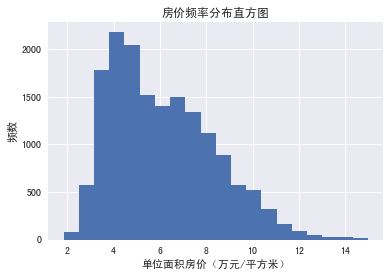

In [75]:
sndHsPr['price'].plot.hist(bins=20)
plt.xlabel("单位面积房价（万元/平方米）")
plt.ylabel("频数")
plt.title("房价频率分布直方图")

In [76]:
print('均值：',sndHsPr.price.mean(),'中位数：',sndHsPr.price.median(),'标准差：',sndHsPr.price.std())  #查看price的均值、中位数和标准差等更多信息
print(sndHsPr.price.quantile([0.25,0.5,0.75]))

均值： 6.115181091918592 中位数： 5.7473 标准差： 2.22933581473287
0.25    4.281225
0.50    5.747300
0.75    7.609975
Name: price, dtype: float64


In [77]:
#查看最高和最低房价样本
pd.concat([(sndHsPr[sndHsPr.price==min(sndHsPr.price)]),(sndHsPr[sndHsPr.price==max(sndHsPr.price)])])

,dist,roomnum,halls,AREA,floor,subway,school,price
2738,丰台,2,2,100.83,high,0,0,1.8348
12788,西城,3,1,77.40,low,1,0,14.9871


## 1.2  自变量分析：  
- 自变量自身分布分析  
- 自变量对因变量影响分析

In [78]:
sndHsPr.roomnum.value_counts()

2    7971
3    4250
1    3212
4     675
5     102
Name: roomnum, dtype: int64

In [79]:
for i in range(7):
    if i != 3:
        print(sndHsPr.columns.values[i],":")
        print(sndHsPr.iloc[:,i].agg(['value_counts']).T)
        print("="*80)
    else:
        continue
print('AREA:')
print(sndHsPr.AREA.agg(['min','mean','median','max','std']).T)

dist :
                丰台    海淀    朝阳    东城    西城   石景山
value_counts  2947  2919  2864  2783  2750  1947
roomnum :
                 2     3     1    4    5
value_counts  7971  4250  3212  675  102
halls :
                  1     2    0   3
value_counts  11082  4231  812  85
floor :
              middle  high   low
value_counts    5580  5552  5078
subway :
                  1     0
value_counts  13419  2791
school :
                  0     1
value_counts  11297  4913
AREA:
min        30.060000
mean       91.746598
median     78.830000
max       299.000000
std        44.000768
Name: AREA, dtype: float64


### 1.2.1 dist

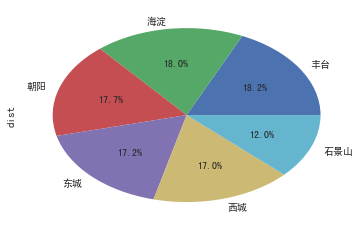

In [80]:
sndHsPr.dist.value_counts().plot.pie(autopct='%.1f%%')

In [81]:
sndHsPr.dist.agg(['value_counts'])

,value_counts
丰台,2947
海淀,2919
朝阳,2864
东城,2783
西城,2750
石景山,1947


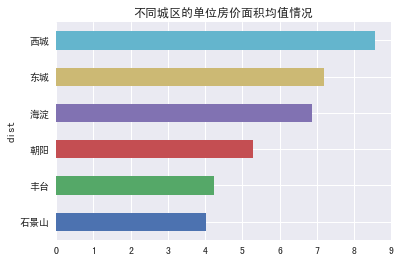

In [82]:
#不同城区的单位面积房价均值情况
sndHsPr.groupby('dist').price.mean().sort_values(ascending=True).plot(kind='barh')
plt.title('不同城区的单位房价面积均值情况')
plt.show()

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


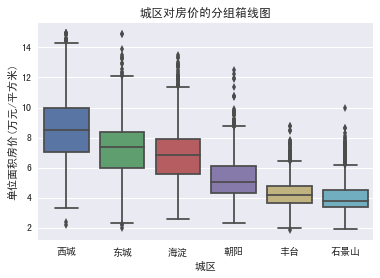

In [83]:
#不同城区的单位面积房价范围情况
sns.boxplot(x='dist',y='price',data=sndHsPr,order=['西城','东城','海淀','朝阳','丰台','石景山'])
plt.ylabel("单位面积房价(万元/平方米)")
plt.xlabel("城区")
plt.title("城区对房价的分组箱线图")

### 1.2.2 roomnum

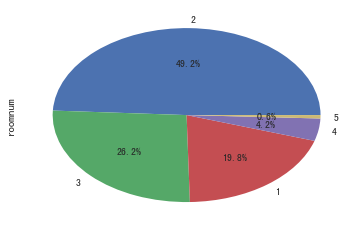

In [84]:
sndHsPr.roomnum.value_counts().plot.pie(autopct='%.1f%%')

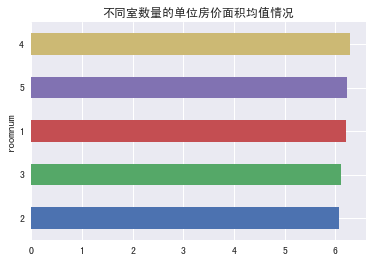

In [85]:
#不同室数量的单位面积房价均值情况
sndHsPr.groupby('roomnum').price.mean().sort_values(ascending=True).plot(kind='barh')
plt.title('不同室数量的单位房价面积均值情况')
plt.show()

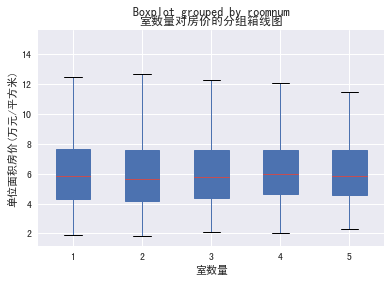

In [86]:
sndHsPr.boxplot(column='price',by='roomnum',patch_artist=True)
plt.ylabel("单位面积房价(万元/平方米)")
plt.xlabel("室数量")
plt.title("室数量对房价的分组箱线图")
plt.show()

不同居室数量房价差异不大

### 1.2.3 halls

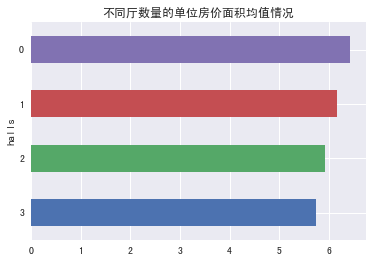

In [87]:
#不同厅数量的单位面积房价均值情况
sndHsPr.groupby('halls').price.mean().sort_values(ascending=True).plot(kind='barh')
plt.title('不同厅数量的单位房价面积均值情况')
plt.show()

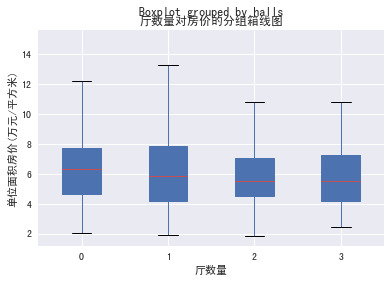

In [88]:
sndHsPr.boxplot(column='price',by='halls',patch_artist=True)
plt.ylabel("单位面积房价(万元/平方米)")
plt.xlabel("厅数量")
plt.title("厅数量对房价的分组箱线图")
plt.show()

厅数对单位面积房价有轻微影响,厅多一点,房价会低一些

### 1.2.4 floor

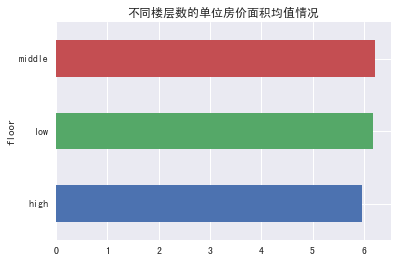

In [89]:
#不同层高的单位面积房价均值情况
sndHsPr.groupby('floor').price.mean().sort_values(ascending=True).plot(kind='barh')
plt.title('不同楼层数的单位房价面积均值情况')
plt.show()

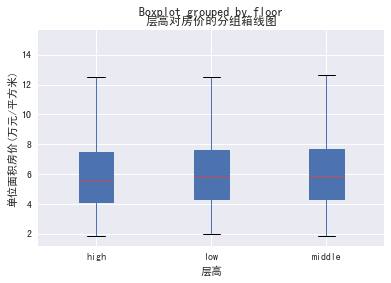

In [90]:
sndHsPr.boxplot(column='price',by='floor',patch_artist=True)
plt.ylabel("单位面积房价(万元/平方米)")
plt.xlabel("层高")
plt.title("层高对房价的分组箱线图")
plt.show()

看起来层高对于房价也有轻微影响，中等层高最贵，低层其次，高层最便宜

### 1.2.5 subway+school

In [91]:
print(pd.crosstab(sndHsPr.subway,sndHsPr.school))
sub_sch=pd.crosstab(sndHsPr.subway,sndHsPr.school)

school     0     1
subway            
0       2378   413
1       8919  4500


In [92]:
sub_sch = sub_sch.div(sub_sch.sum(1),axis = 0)
sub_sch

school,0,1
subway,,
0,0.852024,0.147976
1,0.664655,0.335345


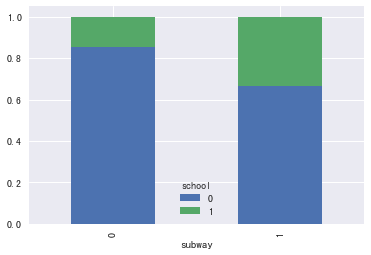

In [93]:
sub_sch.plot(kind='bar',stacked=True)

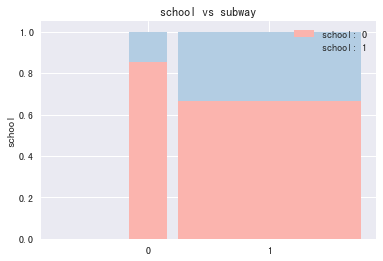

In [94]:
stack2dim(sndHsPr, i="subway", j="school")

地铁房的学区房占比会高一点，非地铁房的学区房占比会低一点。同时，地铁房比非地铁房数量要多

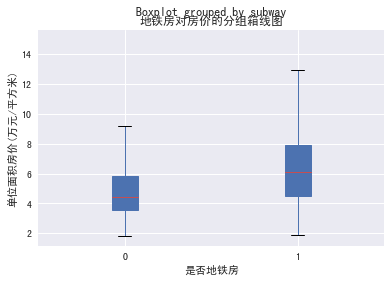

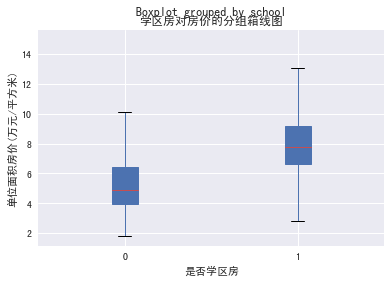

In [95]:
#地铁、学区的分组箱线图
sndHsPr.boxplot(column='price',by='subway',patch_artist=True)
plt.ylabel("单位面积房价(万元/平方米)")
plt.xlabel("是否地铁房")
plt.title("地铁房对房价的分组箱线图")
plt.show()
sndHsPr.boxplot(column='price',by='school',patch_artist=True)
plt.ylabel("单位面积房价(万元/平方米)")
plt.xlabel("是否学区房")
plt.title("学区房对房价的分组箱线图")
plt.show()

两者对房价均有显著影响

### 1.2.6 AREA

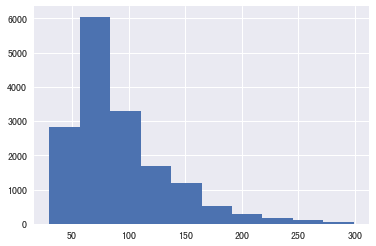

In [96]:
sndHsPr.AREA.hist()

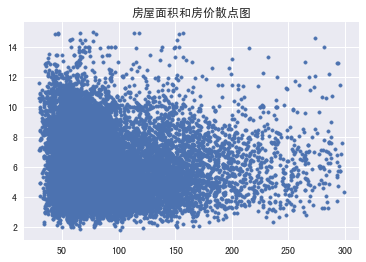

In [97]:
datA=sndHsPr[['AREA','price']]
plt.scatter(datA.AREA,datA.price,marker='.')
plt.title('房屋面积和房价散点图')
plt.show()

In [98]:
#求AREA和price的相关系数矩阵
data1=np.array(datA['price'])
data2=np.array(datA['AREA'])
datB=np.array([data1,data2])

In [99]:
datB

array([[  4.885 ,   4.654 ,   7.1662, ...,   5.017 ,   5.2693,   4.6719],
       [ 46.06  ,  59.09  , 278.95  , ...,  61.79  ,  42.89  ,  89.9   ]])

In [100]:
np.corrcoef(datB)

array([[ 1.        , -0.07395475],
       [-0.07395475,  1.        ]])

可以看出AREA和price的相关系数比较小，并且散点图X轴方向越往右越稀疏，所以对房屋面积取对数

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


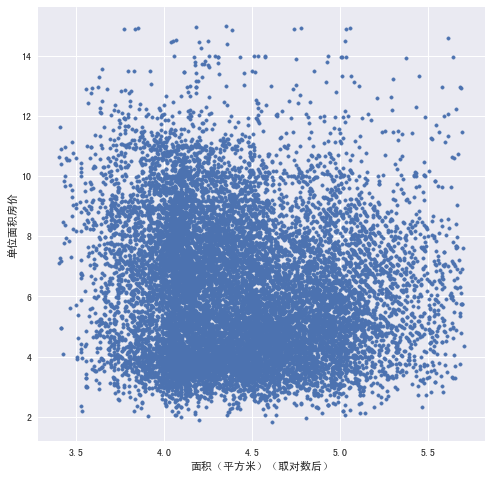

In [101]:
datA['AREA_ln'] = np.log(datA['AREA'])  #对AREA取对数
plt.figure(figsize=(8,8))
plt.scatter(datA.AREA_ln,datA.price,marker='.')
plt.ylabel("单位面积房价")
plt.xlabel("面积（平方米）（取对数后）")

y轴方向也是越往右越稀疏，所以对price也取对数

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


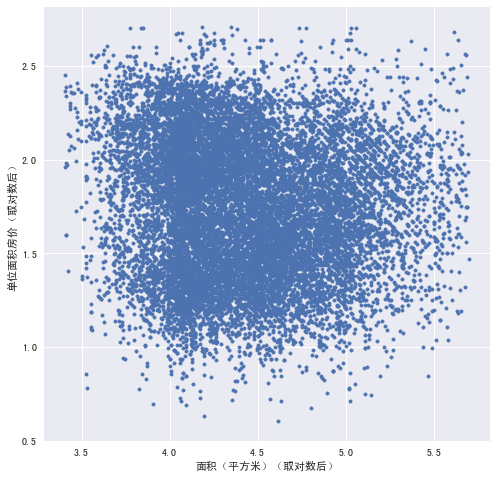

In [102]:
datA['price_ln'] = np.log(datA['price'])  #对AREA取对数
plt.figure(figsize=(8,8))
plt.scatter(datA.AREA_ln,datA.price_ln,marker='.')
plt.ylabel("单位面积房价（取对数后）")
plt.xlabel("面积（平方米）（取对数后）")

X和Y轴方向上随着值增大的离散没有了

In [103]:
#求AREA_ln和price_ln的相关系数矩阵
data1=np.array(datA['price_ln'])
data2=np.array(datA['AREA_ln'])
datB=np.array([data1,data2])
np.corrcoef(datB)

array([[ 1.       , -0.0939296],
       [-0.0939296,  1.       ]])

相关系数有所提高

# 2. 建模

## 2.1 首先检验每个解释变量是否和被解释变量独立

In [113]:
#%%由于原始样本量太大，无法使用基于P值的构建模型的方案，因此按照区进行分层抽样
#dat0 = sndHsPr.sample(n=2000, random_state=123).copy()
from get_sample import *
dat0=get_sample(sndHsPr, sampling="stratified", k=400, stratified_col=['dist'])

In [40]:
#逐个检验变量的解释力度
"""
不同卧室数的单位面积房价差异不大
客厅数越多，单位面积房价递减
不同楼层的单位面积房价差异不明显
地铁房单价高
学区房单价高
"""
"""大致原则如下（自然科学取值偏小、社会科学取值偏大）：
n<100 alfa取值[0.05,0.2]之间
100<n<500 alfa取值[0.01,0.1]之间
500<n<3000 alfa取值[0.001,0.05]之间
"""

'大致原则如下（自然科学取值偏小、社会科学取值偏大）：\nn<100 alfa取值[0.05,0.2]之间\n100<n<500 alfa取值[0.01,0.1]之间\n500<n<3000 alfa取值[0.001,0.05]之间\n'

In [106]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [114]:
print("dist的P值为:%.4f" %sm.stats.anova_lm(ols('price ~ C(dist)',data=dat0).fit())._values[0][4])
print("roomnum的P值为:%.4f" %sm.stats.anova_lm(ols('price ~ C(roomnum)',data=dat0).fit())._values[0][4])#明显高于0.001->不显著->独立
print("halls的P值为:%.4f" %sm.stats.anova_lm(ols('price ~ C(halls)',data=dat0).fit())._values[0][4])#高于0.001->边际显著->暂时考虑
print("floor的P值为:%.4f" %sm.stats.anova_lm(ols('price ~ C(floor)',data=dat0).fit())._values[0][4])#高于0.001->边际显著->暂时考虑
print("subway的P值为:%.4f" %sm.stats.anova_lm(ols('price ~ C(subway)',data=dat0).fit())._values[0][4])
print("school的P值为:%.4f" %sm.stats.anova_lm(ols('price ~ C(school)',data=dat0).fit())._values[0][4])

dist的P值为:0.0000
roomnum的P值为:0.3943
halls的P值为:0.0453
floor的P值为:0.0153
subway的P值为:0.0000
school的P值为:0.0000


In [115]:
###厅数不太显著，考虑做因子化处理，变成二分变量，使得建模有更好的解读
###将是否有厅bind到已有数据集
dat0['style_new']=dat0.halls
dat0.style_new[dat0.style_new>0]='有厅'
dat0.style_new[dat0.style_new==0]='无厅'
dat0.head()

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,dist,roomnum,halls,AREA,floor,subway,school,price,style_new
6212,东城,1,0,47.60,middle,1,0,4.6219,无厅
15658,东城,2,2,90.48,high,1,0,8.2892,有厅
4100,东城,1,0,93.93,low,1,0,4.7909,无厅
3578,东城,3,1,132.44,low,1,1,9.0608,有厅
6361,东城,4,2,144.00,high,1,0,4.3056,有厅


In [116]:
#多分类变量生成哑变量
data=pd.get_dummies(dat0[['dist','floor']])
data.head()

,dist_东城,dist_丰台,dist_朝阳,dist_海淀,dist_石景山,dist_西城,floor_high,floor_low,floor_middle
6212,1,0,0,0,0,0,0,0,1
15658,1,0,0,0,0,0,1,0,0
4100,1,0,0,0,0,0,0,1,0
3578,1,0,0,0,0,0,0,1,0
6361,1,0,0,0,0,0,1,0,0


In [117]:
#生成的哑变量与其他所需变量合并成新的数据框
dat1=pd.concat([data,dat0[['school','subway','style_new','roomnum','AREA','price']]],axis=1)
dat1.head()

,dist_东城,dist_丰台,dist_朝阳,dist_海淀,dist_石景山,dist_西城,floor_high,floor_low,floor_middle,school,subway,style_new,roomnum,AREA,price
6212,1,0,0,0,0,0,0,0,1,0,1,无厅,1,47.60,4.6219
15658,1,0,0,0,0,0,1,0,0,0,1,有厅,2,90.48,8.2892
4100,1,0,0,0,0,0,0,1,0,0,1,无厅,1,93.93,4.7909
3578,1,0,0,0,0,0,0,1,0,1,1,有厅,3,132.44,9.0608
6361,1,0,0,0,0,0,1,0,0,0,1,有厅,4,144.00,4.3056


# 3. 建模

## 3.1 线性回归模型

In [118]:
#lm1 = ols("price ~ dist_丰台+dist_朝阳+dist_东城+dist_海淀+dist_西城+school+subway+floor_middle+floor_low+style_new+roomnum+AREA", data=dat1).fit()
lm1 = ols("price ~ dist_丰台+dist_朝阳+dist_东城+dist_海淀+dist_石景山+dist_西城+school+\
subway+floor_middle+floor_low+floor_high+style_new+AREA", data=dat1).fit()
lm1_summary = lm1.summary()
lm1_summary  #回归结果展示

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     329.5
Date:                Mon, 25 Jun 2018   Prob (F-statistic):               0.00
Time:                        01:21:59   Log-Likelihood:                -4271.5
No. Observations:                2400   AIC:                             8567.
Df Residuals:                    2388   BIC:                             8636.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.2523      0.109     29.788      0.000       3.038       3.466
style_new[T.有厅]     0.4340      0.148      2.937      0.003       0.144       0.724
dist_丰台            -0.8295      0.071    -11.755      0.000      -0.968      -0.691
dist_朝阳            -0.1864      0.072     -2.601      0.009      -0.327      -0.046
dist_东城             1.4061      0.071     19.842      0.000       1.267       1.545
dist_海淀             1.2141      0.071     17.198      0.000       1.076       1.352
dist_石景山           -1.0383      0.072    -14.430      0.000      -1.179      -0.897
dist_西城             2.6863      0.071     37.900      0.000       2.547       2.825
school              1.2999      0.075     17.405      0.000       1.153       1.446
subway              0.6083      0.079      7.746      0.000       0.454       0.762
floor_middle        1.1385      0.054     20.900      0.000       1.032       1.245
floor_low           1.1785      0.056     20.874      0.000       1.068       1.289
floor_high          0.9354      0.055     16.979      0.000       0.827       1.043
AREA               -0.0015      0.001     -2.127      0.034      -0.003      -0.000
==============================================================================
Omnibus:                      138.870   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.569
Skew:                           0.506   Prob(JB):                     7.61e-44
Kurtosis:                       3.981   Cond. No.                     4.42e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [119]:
#%%
lm1 = ols("price ~ C(dist)+school+subway+C(floor)+AREA", data=dat0).fit()
lm1_summary = lm1.summary()
lm1_summary  #回归结果展示

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     360.4
Date:                Mon, 25 Jun 2018   Prob (F-statistic):               0.00
Time:                        01:21:59   Log-Likelihood:                -4275.8
No. Observations:                2400   AIC:                             8574.
Df Residuals:                    2389   BIC:                             8637.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9649      0.136     44.014      0.000       5.699       6.231
C(dist)[T.丰台]         -2.2192      0.108    -20.555      0.000      -2.431      -2.008
C(dist)[T.朝阳]         -1.5764      0.105    -15.061      0.000      -1.782      -1.371
C(dist)[T.海淀]         -0.1885      0.103     -1.833      0.067      -0.390       0.013
C(dist)[T.石景山]        -2.4148      0.110    -21.914      0.000      -2.631      -2.199
C(dist)[T.西城]          1.2714      0.103     12.396      0.000       1.070       1.472
C(floor)[T.low]        0.2444      0.073      3.359      0.001       0.102       0.387
C(floor)[T.middle]     0.2042      0.071      2.880      0.004       0.065       0.343
school                 1.3157      0.075     17.636      0.000       1.169       1.462
subway                 0.6037      0.079      7.677      0.000       0.450       0.758
AREA                  -0.0012      0.001     -1.643      0.100      -0.003       0.000
==============================================================================
Omnibus:                      138.539   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.611
Skew:                           0.508   Prob(JB):                     2.03e-43
Kurtosis:                       3.967   Cond. No.                         719.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

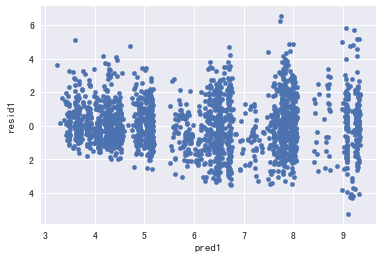

In [120]:
dat0['pred1']=lm1.predict(dat0)
dat0['resid1']=lm1.resid
dat0.plot('pred1','resid1',kind='scatter')  #模型诊断图，存在异方差现象，对因变量取对数

## 3.2 对数线性模型

In [121]:
dat1['price_ln'] = np.log(dat1['price'])  #对price取对数
dat1['AREA_ln'] = np.log(dat1['AREA'])#对AREA取对数

In [124]:
lm2 = ols("price_ln ~ dist_丰台+dist_朝阳+dist_东城+dist_海淀+dist_石景山+dist_西城+school+\
subway+floor_middle+floor_low+floor_high+style_new+AREA", data=dat1).fit()
lm2_summary = lm2.summary()
lm2_summary  #回归结果展示

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_ln   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     352.0
Date:                Mon, 25 Jun 2018   Prob (F-statistic):               0.00
Time:                        01:35:00   Log-Likelihood:                 108.72
No. Observations:                2400   AIC:                            -193.4
Df Residuals:                    2388   BIC:                            -124.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.0249      0.018     58.232      0.000       0.990       1.059
style_new[T.有厅]     0.0575      0.024      2.412      0.016       0.011       0.104
dist_丰台            -0.0703      0.011     -6.184      0.000      -0.093      -0.048
dist_朝阳             0.0732      0.012      6.337      0.000       0.051       0.096
dist_东城             0.3305      0.011     28.931      0.000       0.308       0.353
dist_海淀             0.3169      0.011     27.845      0.000       0.295       0.339
dist_石景山           -0.1306      0.012    -11.256      0.000      -0.153      -0.108
dist_西城             0.5052      0.011     44.218      0.000       0.483       0.528
school              0.1871      0.012     15.540      0.000       0.163       0.211
subway              0.1137      0.013      8.977      0.000       0.089       0.138
floor_middle        0.3508      0.009     39.949      0.000       0.334       0.368
floor_low           0.3605      0.009     39.606      0.000       0.343       0.378
floor_high          0.3137      0.009     35.320      0.000       0.296       0.331
AREA               -0.0001      0.000     -1.172      0.241      -0.000    9.07e-05
==============================================================================
Omnibus:                        3.550   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                3.901
Skew:                           0.004   Prob(JB):                        0.142
Kurtosis:                       3.197   Cond. No.                     4.42e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [130]:
lm2 = ols("price_ln ~ dist_丰台+dist_朝阳+dist_东城+dist_海淀+dist_西城+school+\
subway+floor_middle+floor_low+style_new+AREA_ln", data=dat1).fit()
lm2_summary = lm2.summary()
lm2_summary  #回归结果展示

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_ln   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     352.4
Date:                Mon, 25 Jun 2018   Prob (F-statistic):               0.00
Time:                        01:45:24   Log-Likelihood:                 109.69
No. Observations:                2400   AIC:                            -195.4
Df Residuals:                    2388   BIC:                            -126.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2869      0.055     23.497      0.000       1.179       1.394
style_new[T.有厅]     0.0619      0.024      2.580      0.010       0.015       0.109
dist_丰台             0.0618      0.017      3.730      0.000       0.029       0.094
dist_朝阳             0.2061      0.017     12.007      0.000       0.172       0.240
dist_东城             0.4616      0.018     25.964      0.000       0.427       0.497
dist_海淀             0.4488      0.018     25.279      0.000       0.414       0.484
dist_西城             0.6357      0.018     35.278      0.000       0.600       0.671
school              0.1869      0.012     15.539      0.000       0.163       0.210
subway              0.1132      0.013      8.945      0.000       0.088       0.138
floor_middle        0.0370      0.011      3.243      0.001       0.015       0.059
floor_low           0.0468      0.012      3.994      0.000       0.024       0.070
AREA_ln            -0.0217      0.012     -1.816      0.070      -0.045       0.002
==============================================================================
Omnibus:                        3.834   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                4.241
Skew:                           0.013   Prob(JB):                        0.120
Kurtosis:                       3.204   Cond. No.                         56.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
dat1['pred2']=lm2.predict(dat1)
dat1['resid2']=lm2.resid

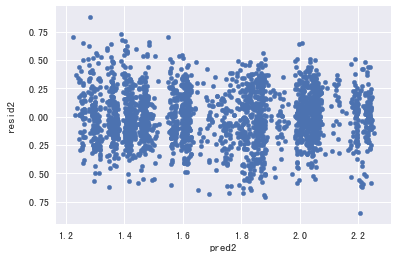

In [133]:
#模型诊断图，异方差现象得到消除
dat1.plot('pred2','resid2',kind='scatter')

## 3.3 有交互项的对数线性模型，城区和学区之间的交互作用

看不同城区的学区房与非学区房的价差规律是否一致

In [139]:
###交互作用的解释
schools=['丰台','朝阳','东城','海淀','西城']
print('石景山非学区房\t',round(sndHsPr[(sndHsPr['dist']=='石景山')&(sndHsPr['school']==0)]['price'].mean(),2),'万元/平方米\t',
     '石景山学区房\t',round(sndHsPr[(sndHsPr['dist']=='石景山')&(sndHsPr['school']==1)]['price'].mean(),2),'万元/平方米')
print('-------------------------------------------------------------------------')
for i in schools:
    print(i+'非学区房\t',round(dat1[(dat1['dist_'+i]==1)&(dat1['school']==0)]['price'].mean(),2),'万元/平方米\t',
          i+'学区房\t',round(dat1[(dat1['dist_'+i]==1)&(dat1['school']==1)]['price'].mean(),2),'万元/平方米')

石景山非学区房	 4.04 万元/平方米	 石景山学区房	 3.31 万元/平方米
-------------------------------------------------------------------------
丰台非学区房	 4.24 万元/平方米	 丰台学区房	 4.76 万元/平方米
朝阳非学区房	 5.07 万元/平方米	 朝阳学区房	 5.78 万元/平方米
东城非学区房	 6.44 万元/平方米	 东城学区房	 8.08 万元/平方米
海淀非学区房	 6.24 万元/平方米	 海淀学区房	 7.67 万元/平方米
西城非学区房	 7.68 万元/平方米	 西城学区房	 9.23 万元/平方米


In [141]:
#### 探索石景山学区房价格比较低的原因，是否是样本量的问题？
print('石景山非学区房\t',sndHsPr[(sndHsPr['dist']=='石景山')&(sndHsPr['school']==0)].shape[0],'\t',
     '石景山学区房\t',sndHsPr[(sndHsPr['dist']=='石景山')&(sndHsPr['school']==1)].shape[0],'\t',
      '石景山学区房仅占石景山所有二手房的0.92%')

石景山非学区房	 1929 	 石景山学区房	 18 	 石景山学区房仅占石景山所有二手房的0.92%


In [150]:
###构造图形揭示不同城区是否学区房的价格问题
df=pd.DataFrame()
dist=['石景山','丰台','朝阳','东城','海淀','西城']
Noschool=[]
school=[]
for i in dist:
    Noschool.append(sndHsPr[(sndHsPr['dist']==i)&(sndHsPr['school']==0)]['price'].mean())
    school.append(sndHsPr[(sndHsPr['dist']==i)&(sndHsPr['school']==1)]['price'].mean())
df['dist']=pd.Series(dist)
df['Noschool']=pd.Series(Noschool)
df['school']=pd.Series(school)
df

,dist,Noschool,school
0,石景山,4.035388,3.310733
1,丰台,4.229100,4.887162
2,朝阳,5.158851,5.740341
3,东城,6.627689,7.851490
4,海淀,6.138580,7.691126
5,西城,7.698937,9.246887


In [151]:
df=df.set_index('dist')

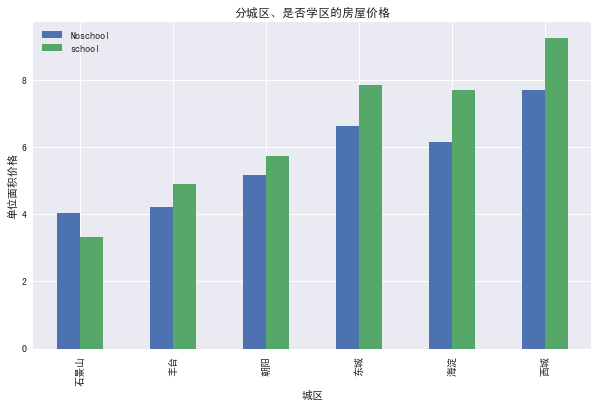

In [160]:
df.plot(kind='bar',figsize=(10,6))
plt.xlabel('城区')
plt.ylabel('单位面积价格')
plt.title('分城区、是否学区的房屋价格')
plt.legend(loc='upper left')
plt.xticks(range(0,6),dist)
plt.show()

In [158]:
'''
df1=df['Noschool'].T.values
df2=df['school'].T.values
plt.figure(figsize=(10,6))
x1=range(0,len(df))
x2=[i+0.3 for i in x1]
plt.bar(x1,df1,color='b',width=0.3,alpha=0.6,label='非学区房')
plt.bar(x2,df2,color='r',width=0.3,alpha=0.6,label='学区房')
plt.xlabel('城区')
plt.ylabel('单位面积价格')
plt.title('分城区、是否学区的房屋价格')
plt.legend(loc='upper left')
plt.xticks(range(0,6),dist)
plt.show()
'''

"\ndf1=df['Noschool'].T.values\ndf2=df['school'].T.values\nplt.figure(figsize=(10,6))\nx1=range(0,len(df))\nx2=[i+0.3 for i in x1]\nplt.bar(x1,df1,color='b',width=0.3,alpha=0.6,label='非学区房')\nplt.bar(x2,df2,color='r',width=0.3,alpha=0.6,label='学区房')\nplt.xlabel('城区')\nplt.ylabel('单位面积价格')\nplt.title('分城区、是否学区的房屋价格')\nplt.legend(loc='upper left')\nplt.xticks(range(0,6),dist)\nplt.show()\n"

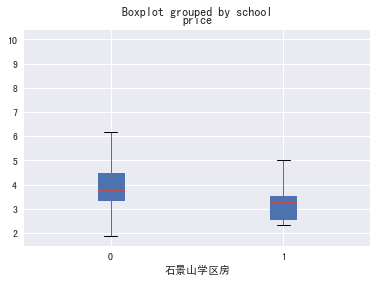

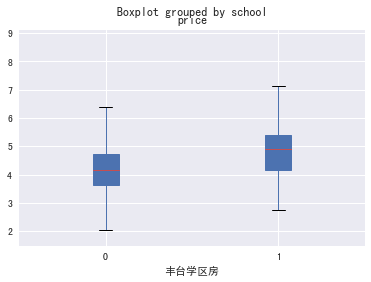

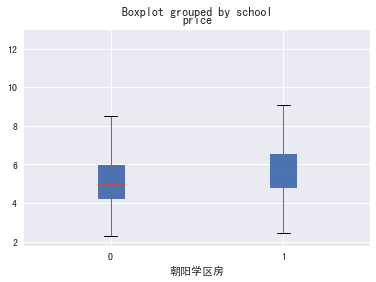

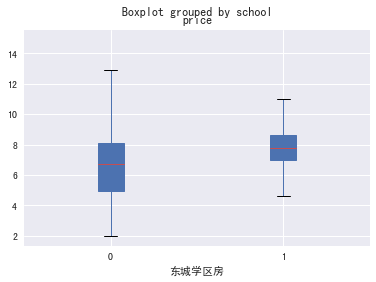

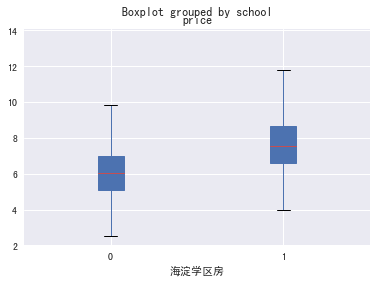

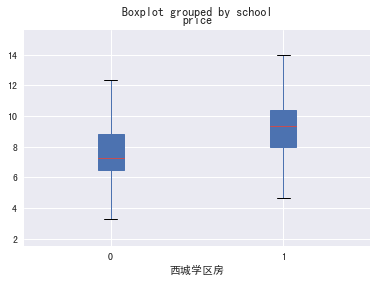

In [162]:
###分城区的学区房分组箱线图
school=['石景山','丰台','朝阳','东城','海淀','西城']
for i in school:
    sndHsPr[sndHsPr.dist==i][['school','price']].boxplot(by='school',patch_artist=True)
    plt.xlabel(i+'学区房')

In [164]:
###有交互项的对数线性模型，城区和学区之间的交互作用
lm3 = ols("price_ln ~ (dist_丰台+dist_朝阳+dist_东城+dist_海淀+dist_西城)*school+subway+floor_middle+floor_low+AREA_ln", 
          data=dat1).fit()
lm3_summary = lm3.summary()
lm3_summary  #回归结果展示

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_ln   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     261.9
Date:                Mon, 25 Jun 2018   Prob (F-statistic):               0.00
Time:                        02:29:16   Log-Likelihood:                 120.64
No. Observations:                2400   AIC:                            -209.3
Df Residuals:                    2384   BIC:                            -116.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3253      0.053     24.929      0.000       1.221       1.430
dist_丰台            0.0603      0.017      3.624      0.000       0.028       0.093
dist_朝阳            0.2126      0.018     11.897      0.000       0.178       0.248
dist_东城            0.4254      0.020     21.370      0.000       0.386       0.464
dist_海淀            0.4391      0.020     21.564      0.000       0.399       0.479
dist_西城            0.6276      0.021     29.584      0.000       0.586       0.669
school            -0.2950      0.134     -2.199      0.028      -0.558      -0.032
dist_丰台:school     0.3678      0.148      2.479      0.013       0.077       0.659
dist_朝阳:school     0.4216      0.137      3.069      0.002       0.152       0.691
dist_东城:school     0.5482      0.136      4.025      0.000       0.281       0.815
dist_海淀:school     0.4893      0.136      3.591      0.000       0.222       0.756
dist_西城:school     0.4842      0.136      3.555      0.000       0.217       0.751
subway             0.1092      0.013      8.609      0.000       0.084       0.134
floor_middle       0.0372      0.011      3.273      0.001       0.015       0.060
floor_low          0.0494      0.012      4.233      0.000       0.027       0.072
AREA_ln           -0.0152      0.012     -1.307      0.191      -0.038       0.008
==============================================================================
Omnibus:                        3.543   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.518
Skew:                           0.070   Prob(JB):                        0.172
Kurtosis:                       3.126   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
###假想情形，做预测，x_new是新的自变量
x_new1=dat1.head(1)
x_new1

,dist_东城,dist_丰台,dist_朝阳,dist_海淀,dist_石景山,dist_西城,floor_high,floor_low,floor_middle,school,subway,style_new,roomnum,AREA,price,price_ln,AREA_ln,pred2,resid2
6212,1,0,0,0,0,0,0,0,1,0,1,无厅,1,47.6,4.6219,1.530806,3.862833,1.81494,-0.284134


In [168]:
#%%
x_new1['dist_朝阳']=0
x_new1['dist_东城']=1
x_new1['roomnum']=2
x_new1['AREA_ln']=np.log(70)
x_new1['subway']=1
x_new1['school']=1
x_new1['style_new']="有厅"

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

单位面积房价： 8.05 万元/平方米
总价： 563.46 万元


/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [172]:
#有交互项预测结果
print("单位面积房价：",round(math.exp(lm3.predict(x_new1)),2),"万元/平方米")
print("总价：",round(math.exp(lm3.predict(x_new1))*70,2),"万元")
#%%

单位面积房价： 8.05 万元/平方米
总价： 563.46 万元


In [171]:
#无交互项预测结果
print("单位面积房价：",round(math.exp(lm2.predict(x_new1)),2),"万元/平方米")
print("总价：",round(math.exp(lm2.predict(x_new1))*70,2),"万元")

单位面积房价： 7.81 万元/平方米
总价： 546.7 万元
